# A Division Train Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [9]:
df = pd.read_csv('../data/MTA_Subway_Terminal_On-Time_Performance__2015-2019.csv')
df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
0,2015-01,1,A DIVISION,1,6874,9017,0.762338
1,2015-01,2,A DIVISION,1,2920,6175,0.472874
2,2015-01,3,A DIVISION,1,4004,5834,0.686322
3,2015-01,4,A DIVISION,1,3692,7623,0.484324
4,2015-01,5,A DIVISION,1,3203,6491,0.493452
...,...,...,...,...,...,...,...
1660,2019-12,S Fkln,B DIVISION,2,2072,2092,0.990440
1661,2019-12,S Rock,B DIVISION,1,3379,3528,0.957766
1662,2019-12,S Rock,B DIVISION,2,1497,1544,0.969560
1663,2019-12,Systemwide,Systemwide,1,137946,172004,0.801993


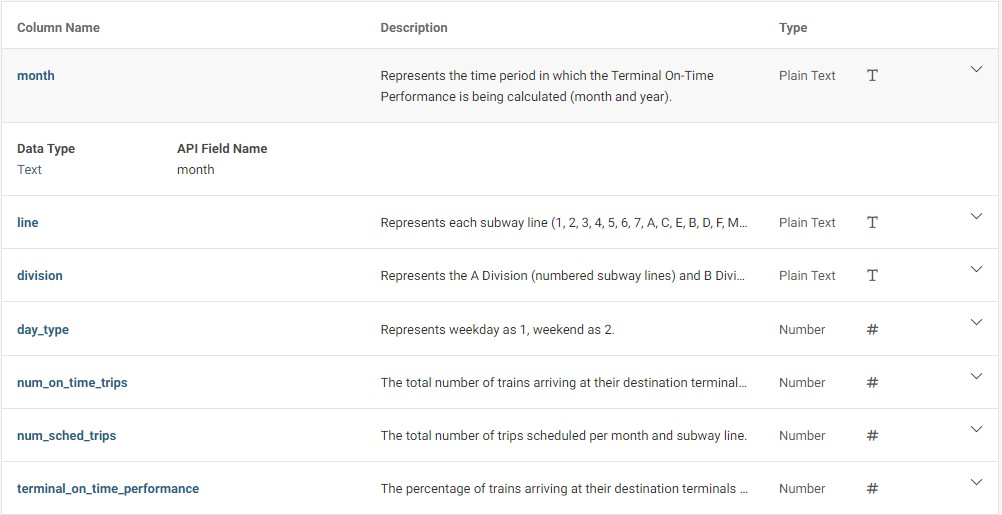

In [10]:
from IPython.display import Image
Image(filename='../static/images/guide.jpg')

## Clean and Filter the data

In [11]:
df['date'] = pd.to_datetime(df['month'], format='%Y-%m')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['season'] = df['date'].dt.quarter

df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,date,year,season
0,1,1,A DIVISION,1,6874,9017,0.762338,2015-01-01,2015,1
1,1,2,A DIVISION,1,2920,6175,0.472874,2015-01-01,2015,1
2,1,3,A DIVISION,1,4004,5834,0.686322,2015-01-01,2015,1
3,1,4,A DIVISION,1,3692,7623,0.484324,2015-01-01,2015,1
4,1,5,A DIVISION,1,3203,6491,0.493452,2015-01-01,2015,1
...,...,...,...,...,...,...,...,...,...,...
1660,12,S Fkln,B DIVISION,2,2072,2092,0.990440,2019-12-01,2019,4
1661,12,S Rock,B DIVISION,1,3379,3528,0.957766,2019-12-01,2019,4
1662,12,S Rock,B DIVISION,2,1497,1544,0.969560,2019-12-01,2019,4
1663,12,Systemwide,Systemwide,1,137946,172004,0.801993,2019-12-01,2019,4


In [15]:
# filter for numbered lines
df_div_A = df[df['division'] == 'A DIVISION']
df_div_A

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,date,year,season
0,1,1,A DIVISION,1,6874,9017,0.762338,2015-01-01,2015,1
1,1,2,A DIVISION,1,2920,6175,0.472874,2015-01-01,2015,1
2,1,3,A DIVISION,1,4004,5834,0.686322,2015-01-01,2015,1
3,1,4,A DIVISION,1,3692,7623,0.484324,2015-01-01,2015,1
4,1,5,A DIVISION,1,3203,6491,0.493452,2015-01-01,2015,1
...,...,...,...,...,...,...,...,...,...,...
1629,12,6,A DIVISION,2,2485,2780,0.893885,2019-12-01,2019,4
1630,12,7,A DIVISION,1,12163,13646,0.891323,2019-12-01,2019,4
1631,12,7,A DIVISION,2,3522,3704,0.950864,2019-12-01,2019,4
1632,12,S 42nd,A DIVISION,1,11079,11264,0.983576,2019-12-01,2019,4


## Analyze the data

In [21]:
# yearly average on time performance
df_avg = df_div_A.groupby(['year'])['terminal_on_time_performance'].mean()
df_avg

year
2015    0.618813
2016    0.581061
2017    0.545761
2018    0.672558
2019    0.823537
Name: terminal_on_time_performance, dtype: float64

In [22]:
# seasonal average on time performance
df_avg_season = df_div_A.groupby(['season'])['terminal_on_time_performance'].mean()
df_avg_season

season
1    0.630471
2    0.672852
3    0.686088
4    0.688589
Name: terminal_on_time_performance, dtype: float64

In [23]:
# monthly average on time performance
df_avg_month = df_div_A.groupby(['month'])['terminal_on_time_performance'].mean()
df_avg_month

month
1     0.637511
2     0.619144
3     0.634758
4     0.672350
5     0.670107
6     0.676097
7     0.668628
8     0.704427
9     0.685211
10    0.683997
11    0.681481
12    0.700290
Name: terminal_on_time_performance, dtype: float64

In [ ]:
# 